In [5]:
import pandas as pd

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [35]:
import numpy as np

In [21]:
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
clf.fit(x_train, y_train);

In [25]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [26]:
clf.score(x_train, y_train)

1.0

In [27]:
clf.score(x_test, y_test)

0.8360655737704918

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



In [32]:
confusion_matrix(y_test, y_pred)

array([[24,  9],
       [ 1, 27]], dtype=int64)

In [33]:
accuracy_score(y_test, y_pred)

0.8360655737704918

In [37]:
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying Model with {i} estimator ")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model Accuracy on test set : {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying Model with 10 estimator 
Model Accuracy on test set : 83.61%

Trying Model with 20 estimator 
Model Accuracy on test set : 81.97%

Trying Model with 30 estimator 
Model Accuracy on test set : 80.33%

Trying Model with 40 estimator 
Model Accuracy on test set : 80.33%

Trying Model with 50 estimator 
Model Accuracy on test set : 80.33%

Trying Model with 60 estimator 
Model Accuracy on test set : 83.61%

Trying Model with 70 estimator 
Model Accuracy on test set : 78.69%

Trying Model with 80 estimator 
Model Accuracy on test set : 81.97%

Trying Model with 90 estimator 
Model Accuracy on test set : 78.69%



In [38]:
import pickle

pickle.dump(clf, open("Random_Forest_Model1.pkl","wb"))

In [40]:
loaded_model = pickle.load(open("Random_Forest_Model1.pkl","rb"))
loaded_model.score(x_test, y_test)

0.7868852459016393

In [1]:
# standart import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = heart_disease.drop("target", axis=1)
x.head()

NameError: name 'heart_disease' is not defined

In [8]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [51]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [52]:
x = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [55]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [56]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [57]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3235867221569877

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3281222657899089

In [61]:
import sklearn
print(sklearn.__version__)

1.5.1


In [80]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [66]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [81]:
car_sales_missing["Make"].fillna("missing", inplace = True)

car_sales_missing["Colour"].fillna("missing", inplace = True)

car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

car_sales_missing["Doors"].fillna(4, inplace = True)

In [82]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [83]:
car_sales_missing.dropna(inplace = True)

In [84]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [91]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


In [85]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#isi categorical dengan "missing" dan numerical value dengan rata rata
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#mendefinisikan kolom
cat_feature = ["Make","Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

#membuat objek imputer
imputer = ColumnTransformer(
    [("cat_imputer", cat_imputer, cat_feature),
    ("door_feature", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)]
)

filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [93]:
x.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [94]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [96]:
car_sales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_features)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [102]:
np.random.seed(42)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22011714008302485

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
import pandas as pd
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [12]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2)


In [7]:
from sklearn.linear_model import Ridge

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Ridge()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.5758549611440127

In [ ]:
from sklearn import svm

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = svm.SVR(kernel='linear')
model.fit(x_train, y_train)

model.score(x_test, y_test)

In [8]:
from sklearn import svm

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = svm.SVR(kernel='rbf')
model.fit(x_train, y_train)

model.score(x_test, y_test)

-0.01648536010717372

In [ ]:
print("hello")

In [14]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.8065734772187598

In [1]:
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8688524590163934

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import numpy as np
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [4]:
y_pred = clf.predict(x_test)
np.mean(y_pred == y_test)

0.8524590163934426

In [5]:
clf.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [6]:
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [7]:
housing_df.head()

NameError: name 'housing_df' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("MedHouseVal",axis=1)
y = housing_df["MedHouseVal"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train, y_train)

y_preds = model.predict(x_test)
y_preds[:10]


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier(n_estimators=2000)

clf.fit(x_train, y_train)

clf_avg_crossval = np.mean(cross_val_score(clf, x, y))
print(clf_avg_crossval)

0.8248087431693989


In [10]:
cross_val_score(clf, x, y, cv = 5)

array([0.83606557, 0.90163934, 0.80327869, 0.78333333, 0.78333333])

#### cross val membagi urutan data test menjadi beberapa bagian sehingga skor yang didapat tidak berdasarkan keberuntungan

In [13]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.904 , 0.096 ],
       [0.43  , 0.57  ],
       [0.4705, 0.5295],
       [0.874 , 0.126 ],
       [0.2295, 0.7705],
       [0.156 , 0.844 ],
       [0.2845, 0.7155],
       [0.955 , 0.045 ],
       [0.972 , 0.028 ],
       [0.4645, 0.5355]])

In [15]:
y_probs_pos = y_probs[:,1]
y_probs_pos

array([0.096 , 0.57  , 0.5295, 0.126 , 0.7705, 0.844 , 0.7155, 0.045 ,
       0.028 , 0.5355, 0.7835, 0.2745, 0.9355, 0.1095, 0.953 , 0.987 ,
       0.9845, 0.107 , 0.035 , 0.05  , 0.517 , 0.0815, 0.6585, 0.74  ,
       0.687 , 0.677 , 0.741 , 0.7515, 0.1195, 0.829 , 0.0945, 0.0875,
       0.025 , 0.335 , 0.5685, 0.138 , 0.585 , 0.7765, 0.618 , 0.8585,
       0.847 , 0.7515, 0.8155, 0.703 , 0.726 , 0.25  , 0.5775, 0.988 ,
       0.1385, 0.037 , 0.219 , 0.1925, 0.793 , 0.726 , 0.178 , 0.103 ,
       0.3645, 0.9705, 0.133 , 0.004 , 0.15  ])

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)
#fpr = false positive rate
#tpr = true negative rate
fpr,tpr

(array([0.        , 0.        , 0.        , 0.        , 0.03448276,
        0.03448276, 0.03448276, 0.03448276, 0.10344828, 0.10344828,
        0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.68965517,
        0.68965517, 1.        ]),
 array([0.     , 0.03125, 0.46875, 0.53125, 0.53125, 0.5625 , 0.625  ,
        0.71875, 0.71875, 0.78125, 0.78125, 0.90625, 0.90625, 0.96875,
        0.96875, 1.     , 1.     ]))

NameError: name 'x_label' is not defined

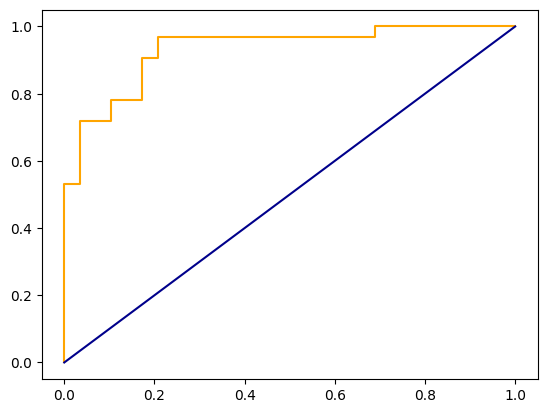

In [21]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="darkblue", )
    x_label("fpr")
    y_label("tpr")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)